In [63]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
csv_data = pd.read_csv('movie.csv', encoding='utf8')

In [65]:
csv_data.head()

,번호,제목,평점,평가
0,15889032,어떤살인,2,와 극단적인 페미영화... 경찰이 잡게 불면 되지 총으로 다 쏴죽이고 대한민국 법이...
1,15889031,세상을 바꾼 변호인,9,마지막엔 눈물이 났다. 다큐멘터리가 더 정확한건 어쩔수없는거 아닐까... 하는 생각...
2,15889030,오베라는 남자,10,연출력과 연기력 최고의 영화
3,15889029,스파이더맨: 파 프롬 홈,7,그렇게 잼있지도 나쁘지도 않네요
4,15889028,어거스트 러쉬,10,10년 전쯤 우연히 보고.. 감동 받았는데.. 문득 생각나서 다시 봐도 감동이 여전...


In [66]:
csv_data.tail()

,번호,제목,평점,평가
9812,15878028,스파이더맨: 파 프롬 홈,9,영화에 귀여움이 가득했어요. 좀 어린이스러운~ 청소년 히어로물 같았지만 재미있었어요...
9813,15878027,토이 스토리 4,10,4편이 더 재밌는것 같아요ㅎ
9814,15878026,존 윅 3: 파라벨룸,10,내인생영화123편.합해서.10번이상봤다..
9815,15878025,스파이더맨: 파 프롬 홈,4,자기 여친과 친구들을 살리려고 그렇게 많은 사람들을 죽이고 때려 부셔야 했나? 화려...
9816,15878024,스파이더맨: 파 프롬 홈,1,Childish 끝판왕.. 지루하고 유치하고 내용없고.. 앞으로 이런 영화를 내돈주...


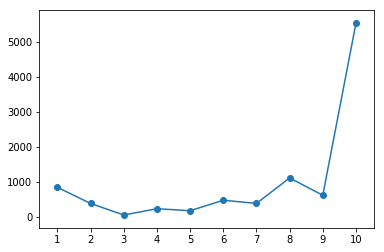

In [67]:
plt_x, plt_y = [i for i in range(1,11)], [list(csv_data['평점']).count(i) for i in range(1,11)]
plt.plot(plt_x, plt_y)
plt.scatter(plt_x, plt_y)
plt.xticks(plt_x)
plt.show()

약 10000개의 데이터를 봤을때 그리 10점이 압도적으로 많았다.  
학습 목적이 긍정문장 부정문장 분류이니만큼 확실하게 긍정문장인것과 확실하게 부정문장인것의 분류가 필요하다.  
가장낮은 1점, 2점을 부정문장으로 분류하고 가장높은 9점 10점을 긍정문장으로 분류 하려고 했으나.  
(이는 8점이나 7점이 조금 아쉽다 는 뉘양스에 단어가 많기 때문이다.)  
10점을 맞은 데이터가 압도적으로 많아 균형이 맞지않는점을 고려하여 1,2,3,4점까지 부정문장으로 분류하는것이 좋을 것 같다.  
(데이터셋에서는 4점도 상당히 부정적이다..)
> 15878025 / 스파이더맨: 파 프롬 홈 / 4점 / 자기 여친과 친구들을 살리려고 그렇게 많은 사람들을 죽이고 때려 부셔야 했나? 화려...

In [6]:
csv_data = csv_data[csv_data.평점 != 5]
csv_data = csv_data[csv_data.평점 != 6]
csv_data = csv_data[csv_data.평점 != 7]
csv_data = csv_data[csv_data.평점 != 8]
csv_data.reset_index(drop=True, inplace=True)
csv_data.head()

,번호,제목,평점,평가
0,15889032,어떤살인,2,와 극단적인 페미영화... 경찰이 잡게 불면 되지 총으로 다 쏴죽이고 대한민국 법이...
1,15889031,세상을 바꾼 변호인,9,마지막엔 눈물이 났다. 다큐멘터리가 더 정확한건 어쩔수없는거 아닐까... 하는 생각...
2,15889030,오베라는 남자,10,연출력과 연기력 최고의 영화
3,15889028,어거스트 러쉬,10,10년 전쯤 우연히 보고.. 감동 받았는데.. 문득 생각나서 다시 봐도 감동이 여전...
4,15889027,청년경찰,10,말이 필요없고이런영화 필요하다. 너네 둘이니까 가능했다 쵝오!!


```
from konlpy.tag import Okt  
okt = Okt()

token = okt.pos("데이터셋에서는 4점도 상당히 부정적입니닼ㅋㅋㅋ", stem=True, norm=True)
print(token)
```

불필요한 token을 만들지 않고 같은 의미를 가진 것 끼리 묶일 수 있게 stemming을 사용합니다.
어근화 stemming (입니다 -> 이다) (상당히 -> 상당하다)
- 한국어를 처리하는 예시입니다 ㅋㅋ -> 한국어Noun, 를Josa, 처리Noun, 하다Verb, 예시Noun, 이다Adjective, ㅋㅋKoreanParticle

또한 붙여써지거나 문법에는 다소 맞지 않을 수 있는 부분을 정규화 합니다. (부정적입니닼ㅋㅋ -> 부정, 적, 이다, ㅋㅋㅋ)
정규화 normalization (입니닼ㅋㅋ -> 입니다 ㅋㅋ, 샤릉해 -> 사랑해)
- 한국어를 처리하는 예시입니닼ㅋㅋㅋㅋㅋ -> 한국어를 처리하는 예시입니다 ㅋㅋ

```
np.array(content_token[0]).T[0]
```

```
array(['오다', '극단', '적', '인', '페미', '영화', '...', '경찰', '이', '잡다', '불면',  
       '되다', '총', '으로', '다', '쏘다', '죽', '이고', '대한민국', '법', '이', '약자', '에',  
       '블리히', '고', '머', '어째', '?..'], dtype='<U11')
```

In [7]:
tmp = True
csv_data_ = csv_data
for cd in np.array(csv_data):
    if (cd[2] == 10 or cd[2] == 9) and tmp:
        csv_data_ = csv_data_[csv_data_.번호 != cd[0]]
    tmp = not tmp
csv_data_.reset_index(drop=True, inplace=True)
print(len(csv_data_))

4582


In [8]:
csv_data_.head()

,번호,제목,평점,평가
0,15889032,어떤살인,2,와 극단적인 페미영화... 경찰이 잡게 불면 되지 총으로 다 쏴죽이고 대한민국 법이...
1,15889031,세상을 바꾼 변호인,9,마지막엔 눈물이 났다. 다큐멘터리가 더 정확한건 어쩔수없는거 아닐까... 하는 생각...
2,15889028,어거스트 러쉬,10,10년 전쯤 우연히 보고.. 감동 받았는데.. 문득 생각나서 다시 봐도 감동이 여전...
3,15889026,명량: 회오리 바다를 향하여,10,저는 나름 잘 봤어요. 배경도 아름답고 자극적이지 않아 좋았어요.
4,15889022,어린 의뢰인,10,정말 연기들잘하시네요 마지막 인형동영상이 많이 슬픔니다... 남잔데 눈물이 주르륵나...


In [9]:
from konlpy.tag import Okt  
okt = Okt()

/Users/lunab/anaconda3/lib/python3.7/site-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [10]:
content_token = [okt.pos(csv_data_['평가'][i], stem=True, norm=True) for i in range(len(csv_data_))]

In [41]:
from keras_preprocessing.text import Tokenizer
t = Tokenizer()

max_len = 0
x_data = []
for token in content_token:
    tmp = [[i[0]+'/'+i[1]] for i in np.array(token)]
    x_data.append(tmp)
    if max_len < len(tmp):
        max_len = len(tmp)
    t.fit_on_texts(tmp)
print(len(t.word_index))

8061


In [43]:
print(x_data[0])
print(t.texts_to_sequences(x_data[0]))

[['오다/Verb'], ['극단/Noun'], ['적/Suffix'], ['인/Josa'], ['페미/Noun'], ['영화/Noun'], ['.../Punctuation'], ['경찰/Noun'], ['이/Josa'], ['잡다/Verb'], ['불면/Noun'], ['되다/Verb'], ['총/Noun'], ['으로/Josa'], ['다/Adverb'], ['쏘다/Verb'], ['죽/Noun'], ['이고/Josa'], ['대한민국/Noun'], ['법/Noun'], ['이/Josa'], ['약자/Noun'], ['에/Josa'], ['블리히/Noun'], ['고/Josa'], ['머/Noun'], ['어째/Noun'], ['?../Punctuation']]
[[79], [3954], [40], [69], [681], [2], [15], [780], [5], [781], [3955], [27], [782], [26], [35], [682], [520], [190], [619], [728], [5], [2707], [7], [3956], [71], [914], [1772], [2127]]


In [44]:
x_data_seq = []
for x in x_data:
    x_data_seq.append(t.texts_to_sequences(x))
print(x_data_seq)

[[[79], [3954], [40], [69], [681], [2], [15], [780], [5], [781], [3955], [27], [782], [26], [35], [682], [520], [190], [619], [728], [5], [2707], [7], [3956], [71], [914], [1772], [2127]], [[115], [237], [199], [5], [129], [1], [3957], [6], [46], [1534], [1773], [89], [20], [38], [15], [4], [47], [11], [83], [1]], [[783], [683], [1535], [1536], [58], [10], [74], [163], [10], [3958], [479], [134], [3], [74], [5], [915], [2]], [[238], [18], [461], [56], [3], [1], [784], [11], [252], [1084], [40], [785], [44], [21], [1]], [[39], [54], [14], [91], [4], [115], [2128], [3959], [5], [151], [275], [15], [320], [133], [199], [5], [3960], [129], [91], [3], [1], [35], [83], [354], [1203], [502]], [[186], [2129], [365], [2130], [17], [30], [3961], [1350], [786], [164], [3962], [551], [4], [1], [2131], [1774], [19], [253], [7], [3963], [11], [153], [77], [2708], [1204], [80], [11], [158], [338], [7], [17], [2709], [42], [1537], [8], [502], [17], [60], [552], [3], [1775], [5], [503], [1351], [2708],

In [45]:
print(len(t.word_index))
print(len(content_token))
print(len(x_data))
print(max_len)

8061
4582
4582
64


In [47]:
from keras.preprocessing import sequence
x_pad_data = sequence.pad_sequences(x_data_seq, maxlen=max_len)
print(x_pad_data)

[[[   0]
  [   0]
  [   0]
  ...
  [ 914]
  [1772]
  [2127]]

 [[   0]
  [   0]
  [   0]
  ...
  [  11]
  [  83]
  [   1]]

 [[   0]
  [   0]
  [   0]
  ...
  [   5]
  [ 915]
  [   2]]

 ...

 [[   0]
  [   0]
  [   0]
  ...
  [  16]
  [  29]
  [ 315]]

 [[   0]
  [   0]
  [   0]
  ...
  [  13]
  [ 131]
  [  49]]

 [[   0]
  [   0]
  [   0]
  ...
  [ 117]
  [  73]
  [   3]]]


In [48]:
x_train = np.asarray(x_pad_data, np.float32)/len(t.word_index)
# x_train = np.asarray(x_pad_data, np.float32)

In [49]:
y_train = []
for d in csv_data_['평점']:
    if d >= 9:
        y_train.append(1)
    elif d <= 4:
        y_train.append(0)

In [50]:
print(len(x_train), len(y_train))

4582 4582


In [70]:
x_train_ = x_train.reshape((-1,max_len,1))
y_train_ = np.array(y_train).reshape((-1,1))
print(x_train_.shape)
print(y_train_.shape)

from keras.models import Sequential
# from keras.layers import SimpleRNN, Dense
from keras.layers import LSTM, Dense, ReLU, LeakyReLU
from keras.optimizers import SGD

np.random.seed(0)
model = Sequential()
model.add(LSTM(62, input_shape=(max_len,1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mse', optimizer=SGD(lr=0.01, decay=0.0001, momentum=0.9, nesterov=True))

(4582, 64, 1)
(4582, 1)


In [86]:
history = model.fit(x_train_, y_train_, epochs=10, verbose=1)

TypeError: Unrecognized keyword arguments: {'metrics': ['accuracy']}

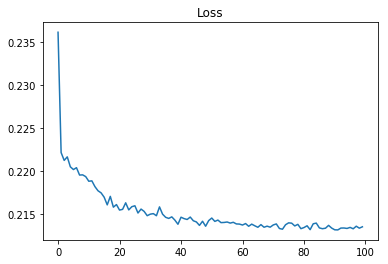

In [72]:
plt.plot(history.history["loss"])
plt.title("Loss")
plt.show()

In [83]:
predictions = model.predict(x_train_)

for i in range(len(predictions)):
    n = i
    if predictions[i,0] > 0.55:
        
        print(1, end=' ')
    else:
        continue
        print(0, end=' ')
    print(csv_data_['평가'][n])

1 마지막엔 눈물이 났다. 다큐멘터리가 더 정확한건 어쩔수없는거 아닐까... 하는 생각도 들었다.
1 10년 전쯤 우연히 보고.. 감동 받았는데.. 문득 생각나서 다시 봐도 감동이 여전한 영화
1 저는 나름 잘 봤어요. 배경도 아름답고 자극적이지 않아 좋았어요.
1 정말 연기들잘하시네요 마지막 인형동영상이 많이 슬픔니다... 남잔데 눈물이 주르륵나네요 잘봤습니다. 다들 즐거운하루보내세요
1 재밌어요 스파이더맨 너므 죠아 ㅠㅠ
1 진짜 이딴 영화를 IMAX로 돈날려가며 본 내잘못이다
1 영화를 다보고 나서 저는 그만 물에 잠기고 말았습니다. 그 물은 다름 아닌 저의 눈물이었습니다. 저는 위로가 필요할때면 항상 이 영화를 찾습니다.
1 피터 찌리릿의 활약이 돋보이고 멋있는 작품
1 대한민국 Top3 영화
1 ????????????????????
1 .. 왜 갑자기  '어린 소녀들이 함께 이겨내는 청년성공스토리' 처럼 되버린거야... 왜그러는거야... 느낌 완전 변했음... 애나벨과의 의리로 봤다..
1 옛날 스파이더맨 1이 왜 생각이나지 ?
1 진짜 말이 필요없는 작품 또 봐도 재밌다
1 뭔가 좀 아프다...
1 올드보이 살인의 추억과 더불어 이 정도로 훌륭하게 잘 만든 한국 영화를 여태까지 못 봄.
1 2번봐야하는 영화라고 하길래 2번보고 지려버림
1 서사를 찾을 필요가 있나?
1 나 지금 다시보는데 차승원 연기 진짜 쩐다...
1 보핍이 예뻐서 2점줍니다
1 평점 테러하는 것들은 친일파거나 친일파후손이거나 둘중하나 한마디로 쓰레기란 뜻
1 재미없고 지루했어요 로다주의 빈자리가 넘 크네요
1 개꿀잼이다 ㄹㅇ루 최고
1 내용이 없음 그냥 딱 2000년대 초반 싸구려 한국영화
1 정해인 연기가 정말ㅋ중2병걸린연기 케이블로 봐서 다행 돈은아꼈음
1 잘 알지도 못 하지만 애초에 물어보지도 않았다...
1 이런 단순한 그림체로도 이런 큰 여운을 줄 수가 있다.
1 이게 끝이 아니기를...성룡 영원하라
1 뒤늦게 보게된영화인데 감동적이고 멋진영화네요
1 .,.,.,.,.,

1 후속편 기대기대!!!
1 좋은 배우가 많이 출연한 영화
1 잠와죽는줄 아... ㅜㅜ
1 별로 재미없는 영화 지루하고
1 마블의 큰그림에 다시 한번 소름 돋는 영화
1 미스테리오 나빠.. 닉퓨리 너도 나빠....
1 호불호가 갈리겠지만 난 잼있었다
1 스파이더맨 시리즈중 최악입니다.
1 마음이 평화로워지는 아름다운 영화입니다
1 뜨거워.후루루룩 뜨거워후루룩
1 영화를 보고 눈물을 흘렸습니다. 정말 추천합니다.
1 352만은 무슨 352명 이겠지
1 개쒯 소재는 좋았는데 암튼 대실망
1 피터보면서 자꾸 아이언맨이 그리워짐
1 스파이더맨은 앞으로 무조건 톰홀랜드!!톰홀랜드 짱멋있다!!!
1 어렸을 적에 봤던 영화를 30이 넘어 다시 봤다. 내겐 추억의 영화
1 현실을 펼쳐놓고, 다시 줏어담지 않는 봉감독님의 팩트폭행
1 그런 영화 있잖아 스토리가 뭐네 액션이 뭐네 죤나 뻔한데 할때마다 계속 보게되는영화 그냥 끌림
1 assemble 하는데 소름돋음 ㄹㅇ 마블 3000만큼 사랑해요
1 정말 이런 스토리를 구상해 낸 사람이 존경스럽다 평범한 사람의 뇌에선 나올 수 없는 내용. 마블영화중 내 기준 최고
1 말이 필요없는 영화 강추
1 알라딘보다 더 재미있게 봣어요~!!!강추
1 도어락 소재를 벗어날 때부터 망
1 그냥최고다!! 짜릿하다 매우매우 영화가
1 말이 필요없다 멋있다 톰 홀랜드 짱
1 마블영화중에 젤 재미없었다
1 마블 영화중 역대 최악. 캡틴마블보다도 별로였음
1 어메이징 스파이더맨이 3편까지  나왔어야 했는데....아쉽다
1 쓰레기 같은 영화 넷플릭스에서 봐도 시간아까운데. 극장간 사람들은...진짜 유치에 쿵푸까지..기분 엿같다
1 백번봐도 안질려 ㅠㅠㅠㅠ 하울 진짜 잘생겼다..5번은 본듯 ㅠㅠ
1 두고두고 보고싶은 영화...
1 닥터스트레인지 너무 멋짐
1 온 가족 다 즐겁게 봤습니다 강추훟ㅎㅎㅎㅎ
1 최고  그냥 한번 보세요^^
1 후회되는 영화.. 이렇게 재미있는 영화를 왜 이제서야 봤을까.. 후회하게 된다..
1 잔잔함... 잼있게 잘 보았습니다


1 전투 씬은 모든 영화 통틀어서 탑3 인정합니다
1 정말 재미있어요ㅠㅠ 꼭 보세요!!
1 항상 가슴속에 품고 사는 영화
1 기대이상. 즐감했어요~역시 윌 스미스 굿~~~
1 123 전작들이 너무 훌륭했어서 요번껀 재미는 있었으나 전작에 못미치는 느낌? 하지만 토이스토리니까 10점드립니다
1 천만 관객 영화 되야한다고 생각합니다 사람들이 그 값어치를 몰라주는듯 그리고 싫어요테러왜하는건지
1 10번째 다시봐도 마지막엔 울컥한다..
1 가족간의 갈등과 사랑을 세심하게 터치한 감독님의 연출이 기대이상이네요.
1 타이타닉2는 명작이었던걸 깨닫게 해주는 영화.씨X
1 초3 아이가 봤는데 너무 재밌다고 합니다
1 진짜 대명작임ㅠㅜ 원작이랑 싱크로율 장난아니고 진짜ㅠㅜ 많이봐도 안질릴거 같음ㅠ ost 전부다 완전 좋구 중독되따????
1 OST도 너무 좋고  배우들도 너무  좋았어요
1 역시나 재미있는 영화~ 스파이더맨은 정말 다이나믹합니다
1 최고의 영화~자꾸 자꾸 생각나요~
1 김무열 연기가 뭐가 좋다는 거지? 잔뜩 힘만 들어가서
1 하아 왜 봣을까 클레멘타인을 이어선개 똥작
1 사랑하면 놓아줄 줄도 알아야 한다..
1 아.... 추억이 하나하나 끝나가나..
1 주인공 스파이더맨 찌질이 영화
1 크으으으 갓파이더 ♥?
1 또보고싶읍니다....
1 재미있어요~~^^~~~~
1 발연기 억지스토리에 기대했다 대실망마블왜이래 토니스타크데려와라
1 스파이더맨 vs 드론 ㅋㅋㅋㅋ 이게 영화냐?
1 아이랑함께봤는데..아이는너무재밌어합니다^^
1 내마음속에 비밀같은 이야기
1 쿠키는 무조건 봐야합니다
1 마블 사랑합니다.♡♡♡
1 충분히 좋은 영화임 빠져드는 매력이 있음
1 재밌었어요. 마블 좀 지루해져가는데 디씨가 조금씩 살아나네요.
1 일본제품 불매한다면서 이건 선택적 불매인거야? 이 웃겨 죽겠넼
1 중딩 까지만 재미있을 영화 스토리의 짜임세가 없음 스파이더맨 영화는 저번도 그렇고 제대로 만들 생각이 없는 듯
1 누구를 위한 전쟁인가?
1 불매한다면서 소니지원받는 스파이더맨은 왜